# DSI Instructor Task: Part 1 - Modeling Challenge

### Python Coding and Data Set

* Load in the data file and header file provided. The dataframe does not currently have a header, load in the header file and attach it to the dataframe
* Comment on any steps you might take to evaluate or transform the dataset.

In [1]:
# import libraries 
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import sklearn
%matplotlib inline 

In [2]:
# import CSV
df = pd.read_csv('breast-cancer.csv', header=None)

In [3]:
# check imported CSV
df.head(5)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
# read in headers 
header_file = open('field_names.txt', 'r')
header = header_file.readlines()

In [5]:
# set dataframe headers
df.columns = header
df.columns = df.columns.str.replace("\n","")

In [51]:
# check dataframe 
df.tail(5)

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400
568,92751,0,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,9.456,30.37,59.16,268.6,0.08996,0.06444,0.0000,0.0000,0.2871,0.07039


In [52]:
# distribution between 2 kinds of tumor
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

In [7]:
# quick overview of the dataframe 
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
ID                            569 non-null int64
diagnosis                     569 non-null object
radius_mean                   569 non-null float64
radius_sd_error               569 non-null float64
radius_worst                  569 non-null float64
texture_mean                  569 non-null float64
texture_sd_error              569 non-null float64
texture_worst                 569 non-null float64
perimeter_mean                569 non-null float64
perimeter_sd_error            569 non-null float64
perimeter_worst               569 non-null float64
area_mean                     569 non-null float64
area_sd_error                 569 non-null float64
area_worst                    569 non-null float64
smoothness_mean               569 non-null float64
smoothness_sd_error           569 non-null float64
smoothness_worst              569 non-null float64
compactness_mean              5

,ID,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


* Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [8]:
# create a new dataframe for benign cancer 
benign = df.loc[df['diagnosis'] == 'B'].iloc[:,14:20]

In [9]:
# check the information
benign.describe()

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
count,357.000000,357.000000,357.000000,357.000000,357.000000,357.000000
mean,2.000321,21.135148,0.007196,0.021438,0.025997,0.009858
std,0.771169,8.843472,0.003061,0.016352,0.032918,0.005709
min,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000
25%,1.445000,15.260000,0.005212,0.011320,0.010990,0.006433
50%,1.851000,19.630000,0.006530,0.016310,0.018400,0.009061
75%,2.388000,25.030000,0.008534,0.025890,0.030560,0.011870
max,5.118000,77.110000,0.021770,0.106400,0.396000,0.052790


In [10]:
# create a new dataframe for malignant 
malignant = df.loc[df['diagnosis'] == 'M'].iloc[:,14:20]

In [11]:
# check it's information 
malignant.describe()

,smoothness_mean,smoothness_sd_error,smoothness_worst,compactness_mean,compactness_sd_error,compactness_worst
count,212.000000,212.000000,212.000000,212.000000,212.000000,212.000000
mean,4.323929,72.672406,0.006780,0.032281,0.041824,0.015060
std,2.568546,61.355268,0.002890,0.018387,0.021603,0.005517
min,1.334000,13.990000,0.002667,0.008422,0.011010,0.005174
25%,2.715500,35.762500,0.005085,0.019662,0.026998,0.011415
50%,3.679500,58.455000,0.006209,0.028590,0.037125,0.014205
75%,5.206250,94.000000,0.007971,0.038910,0.050443,0.017497
max,21.980000,542.200000,0.031130,0.135400,0.143800,0.040900


In [12]:
# we can see the difference either by calculating or conducting EAD
# calculate the mean and median 
print "Benign's smoothness mean is: " + str(benign["smoothness_mean"].mean())
print "Malignant's smoothness mean is: " + str(malignant["smoothness_mean"].mean())
print " "
print "Benign's smoothness median  is: " + str(benign["smoothness_mean"].median())
print "Malignant's smoothness median is: " + str(malignant["smoothness_mean"].median())
print " "
print "Benign's compactness_mean mean is: " + str(benign["compactness_mean"].mean())
print "Malignant's compactness_mean mean is: " + str(malignant["compactness_mean"].mean())
print " "
print "Benign's compactness_mean median  is: " + str(benign["compactness_mean"].median())
print "Malignant's compactness_mean median is: " + str(malignant["compactness_mean"].median())

Benign's smoothness mean is: 2.00032128852
Malignant's smoothness mean is: 4.32392924528
 
Benign's smoothness median  is: 1.851
Malignant's smoothness median is: 3.6795
 
Benign's compactness_mean mean is: 0.0214382464986
Malignant's compactness_mean mean is: 0.0322811650943
 
Benign's compactness_mean median  is: 0.01631
Malignant's compactness_mean median is: 0.02859


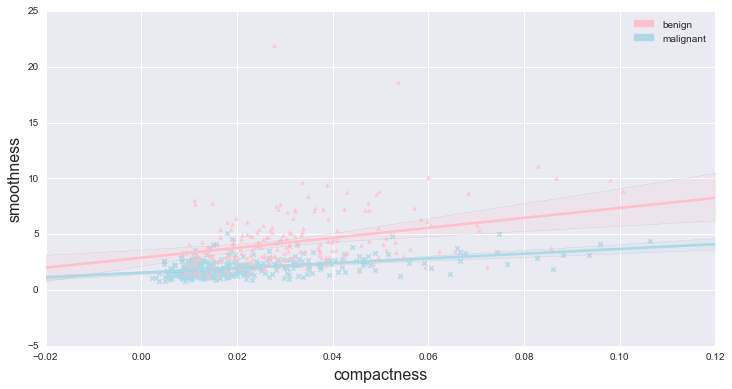

In [13]:
# draw a plot to see if there is a difference
import matplotlib.patches as mpatches
plt.figure(figsize=(12,6))
sns.regplot(y="smoothness_mean", x="compactness_mean", data=benign, color='lightblue', marker = 'x', label= "benign")
sns.regplot(y='smoothness_mean', x='compactness_mean', data=malignant, color='pink', marker = '^',label= "malignant")
plt.xlabel('compactness', fontsize=16)
plt.ylabel('smoothness', fontsize=16)
pink_patch = mpatches.Patch(color='pink', label='benign')
blue_patch = mpatches.Patch(color='lightblue', label='malignant')
plt.legend(handles=[pink_patch,blue_patch])
plt.show()

* Write a function to generate bootstrap samples of the data.

In [14]:
def sample(original_df, sample_size, weight_column):
    df_sample = original_df.sample(frac=sample_size, replace=False, weights = weight_column)
    return df_sample

In [16]:
# test if the function works
test_sample = sample(df, 0.01, 'radius_mean')
test_sample

,ID,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
111,86408,B,12.63,20.76,82.15,480.4,0.09933,0.12090,0.10650,0.06021,...,13.33,25.47,89.00,527.4,0.1287,0.2250,0.22160,0.11050,0.2226,0.08486
343,898431,M,19.68,21.68,129.90,1194.0,0.09797,0.13390,0.18630,0.11030,...,22.75,34.66,157.60,1540.0,0.1218,0.3458,0.47340,0.22550,0.4045,0.07918
80,861103,B,11.45,20.97,73.81,401.5,0.11020,0.09362,0.04591,0.02233,...,13.11,32.16,84.53,525.1,0.1557,0.1676,0.17550,0.06127,0.2762,0.08851
357,901028,B,13.87,16.21,88.52,593.7,0.08743,0.05492,0.01502,0.02088,...,15.11,25.58,96.74,694.4,0.1153,0.1008,0.05285,0.05556,0.2362,0.07113
272,8910988,M,21.75,20.99,147.30,1491.0,0.09401,0.19610,0.21950,0.10880,...,28.19,28.18,195.90,2384.0,0.1272,0.4725,0.58070,0.18410,0.2833,0.08858
345,898677,B,10.26,14.71,66.20,321.6,0.09882,0.09159,0.03581,0.02037,...,10.88,19.48,70.89,357.1,0.1360,0.1636,0.07162,0.04074,0.2434,0.08488


### Exploratory Analysis

Identify 2-3 variables that are predictive of a malignant tumor.
Display the relationship visually and write 1-2 sentences explaining the relationship.

In [18]:
# paireplot is one way to quick see some difference between features and variables 
df['diagnosis'] = df['diagnosis'].map(lambda x: 1 if x == 'M' else 0)
sns.pairplot(df, hue='diagnosis', vars=df.columns)

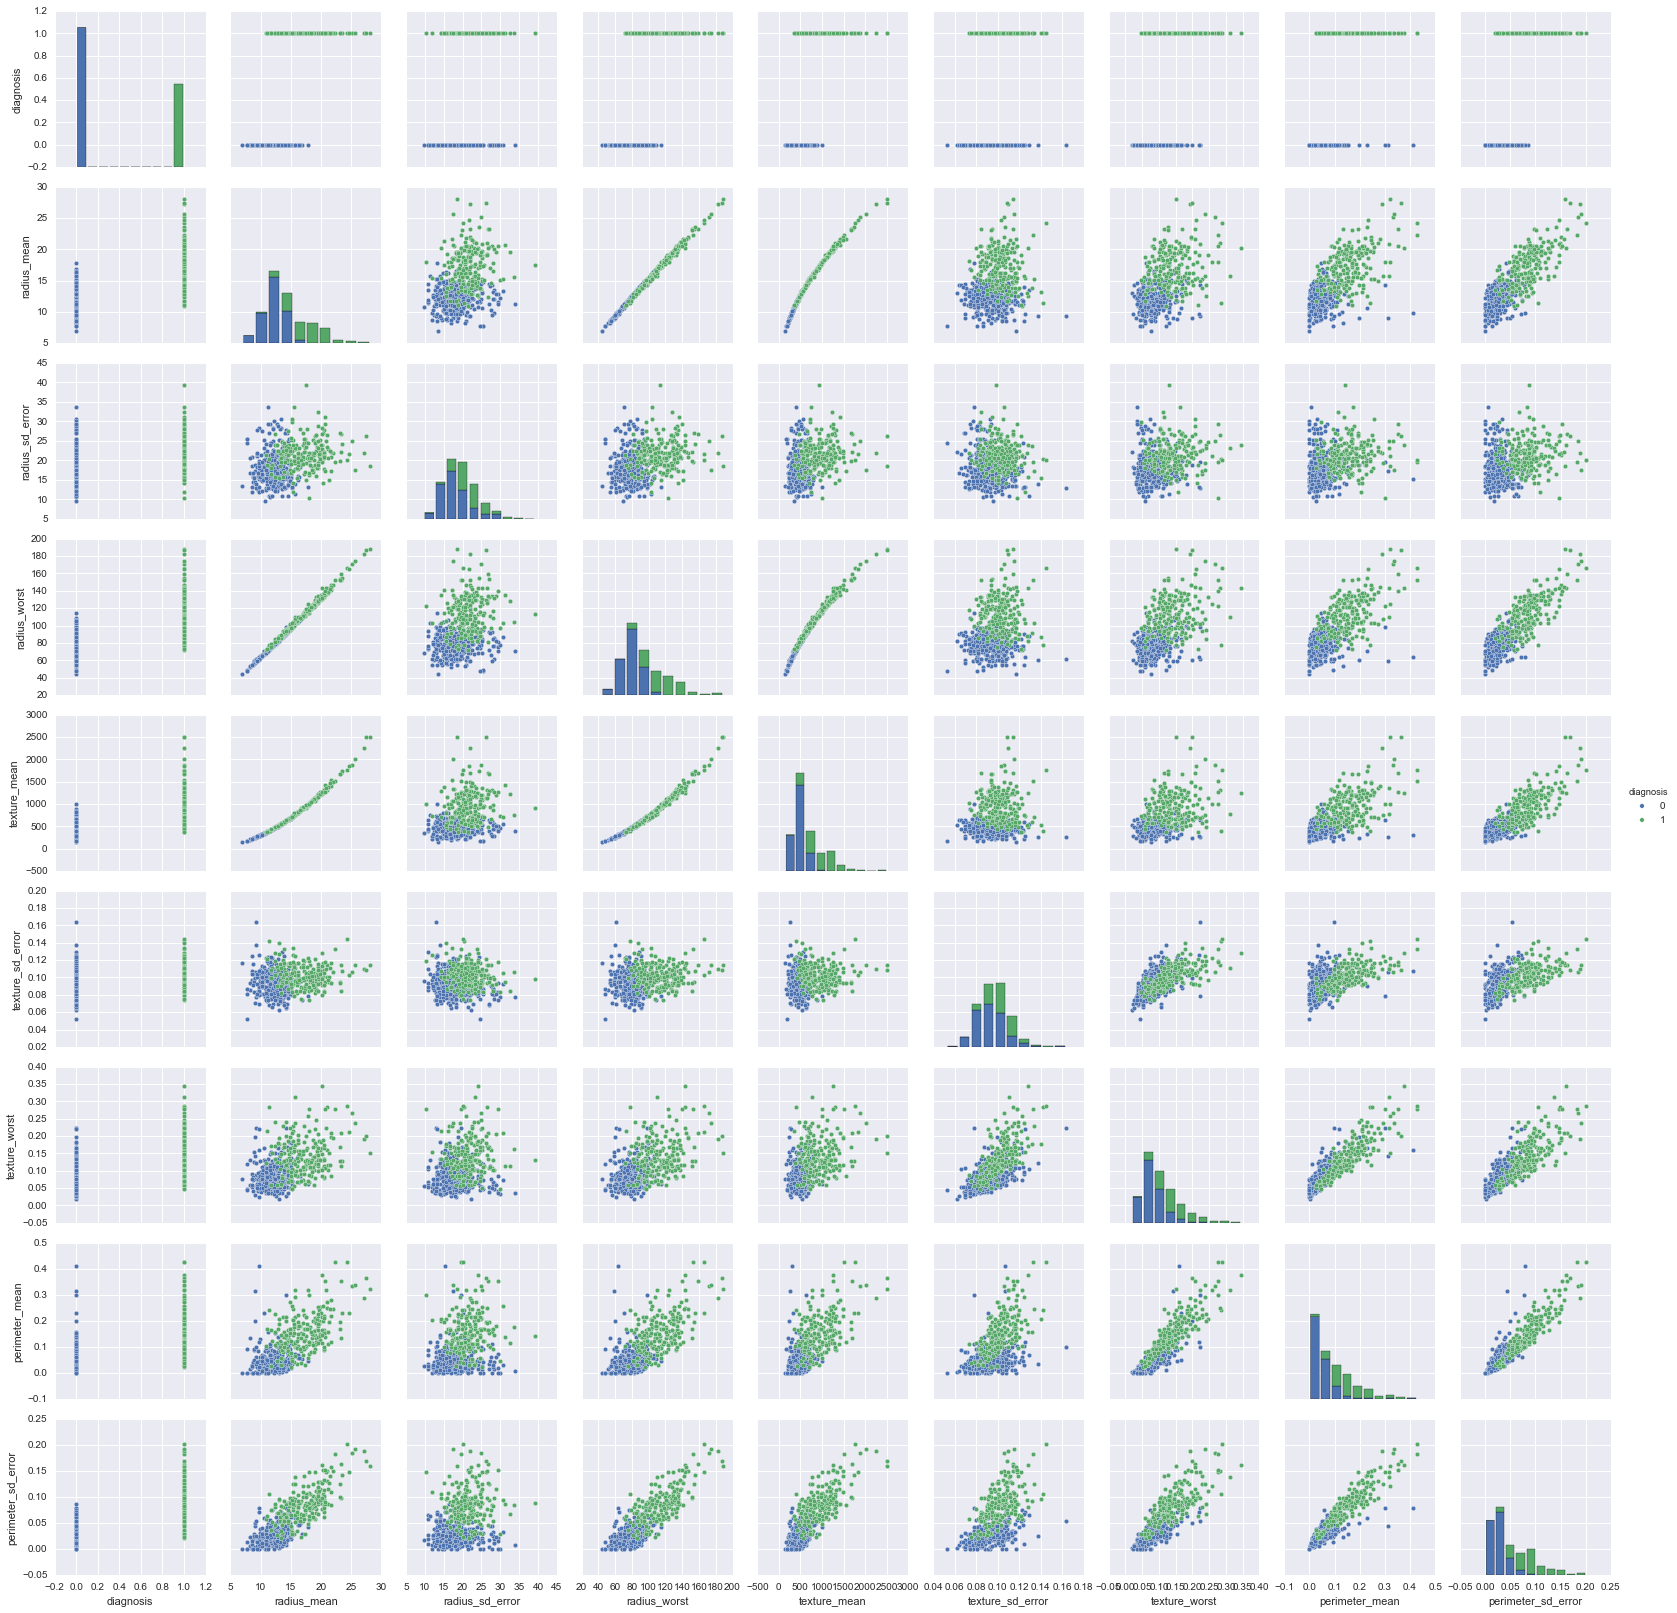

In [19]:
# take a closer look at the first few, we can already see that radius_mean might be a good indicator
# for predicting malignant because its area tend to be larger 
df_10 = df.iloc[:,1:10]
sns.pairplot(df_10, hue='diagnosis', vars=df_10.columns)

In [31]:
# One way to find out which featuers contribute most is to reduce the dimension, by conducting PCA
# we can tell which features best describes the dataset while maintain the most information
# import tools for PCA 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA 

In [32]:
# conduct PCA
malignant_pca = df.loc[df['diagnosis'] == 1].iloc[:,2:]

In [33]:
# scale x and y
scaled_malignant = StandardScaler().fit_transform(malignant_pca)

In [34]:
# we can see that we can explain 83% of the data with only 5 principle components
# print out the number of PCs 
for n in range(1, 6):
    pca = PCA(n_components = n).fit(scaled_malignant)
    print str(n) + ' component(s): ' + str(sum(pca.explained_variance_ratio_))

1 component(s): 0.339027150728
2 component(s): 0.60419871479
3 component(s): 0.71253648471
4 component(s): 0.784111958916
5 component(s): 0.830543723014


In [35]:
# make it into a dataframe 
pca_df = PCA(n_components=3)
pca_df.fit(scaled_malignant)
pca_final = pca_df.transform(scaled_malignant)

PCAdf = pd.DataFrame(pca_final, columns=['PC1','PC2', 'PC3'])

In [36]:
# find the correlation between PCAs and original features 
pca_corr = pd.concat([malignant_pca, PCAdf], axis =1)

In [37]:
# correlation matrix
pca_corr1 = pca_corr.corr().iloc[-3:].T
pca_corr1 = pca_corr1[:-3]
print pca_corr1.sort_values("PC1").iloc[:5]
print pca_corr1.sort_values("PC2").iloc[:5]

                         PC1       PC2       PC3
compactness_worst  -0.288799  0.057846 -0.071789
concavity_sd_error -0.273366 -0.311721 -0.096356
texture_sd_error   -0.235559 -0.216139  0.053146
area_worst         -0.197263  0.029482 -0.135802
area_mean          -0.195879 -0.422838 -0.036144
                              PC1       PC2       PC3
fractal_dimension_worst -0.135051 -0.489226 -0.021210
symmetry_sd_error       -0.079831 -0.448081  0.040356
area_mean               -0.195879 -0.422838 -0.036144
concavity_sd_error      -0.273366 -0.311721 -0.096356
symmetry_worst          -0.131245 -0.306069  0.146619


In [49]:
malignant_pairplot = df[['diagnosis','compactness_worst','concavity_sd_error','texture_sd_error','fractal_dimension_worst', 'symmetry_sd_error', 'area_mean']]

0    357
1    212
Name: diagnosis, dtype: int64

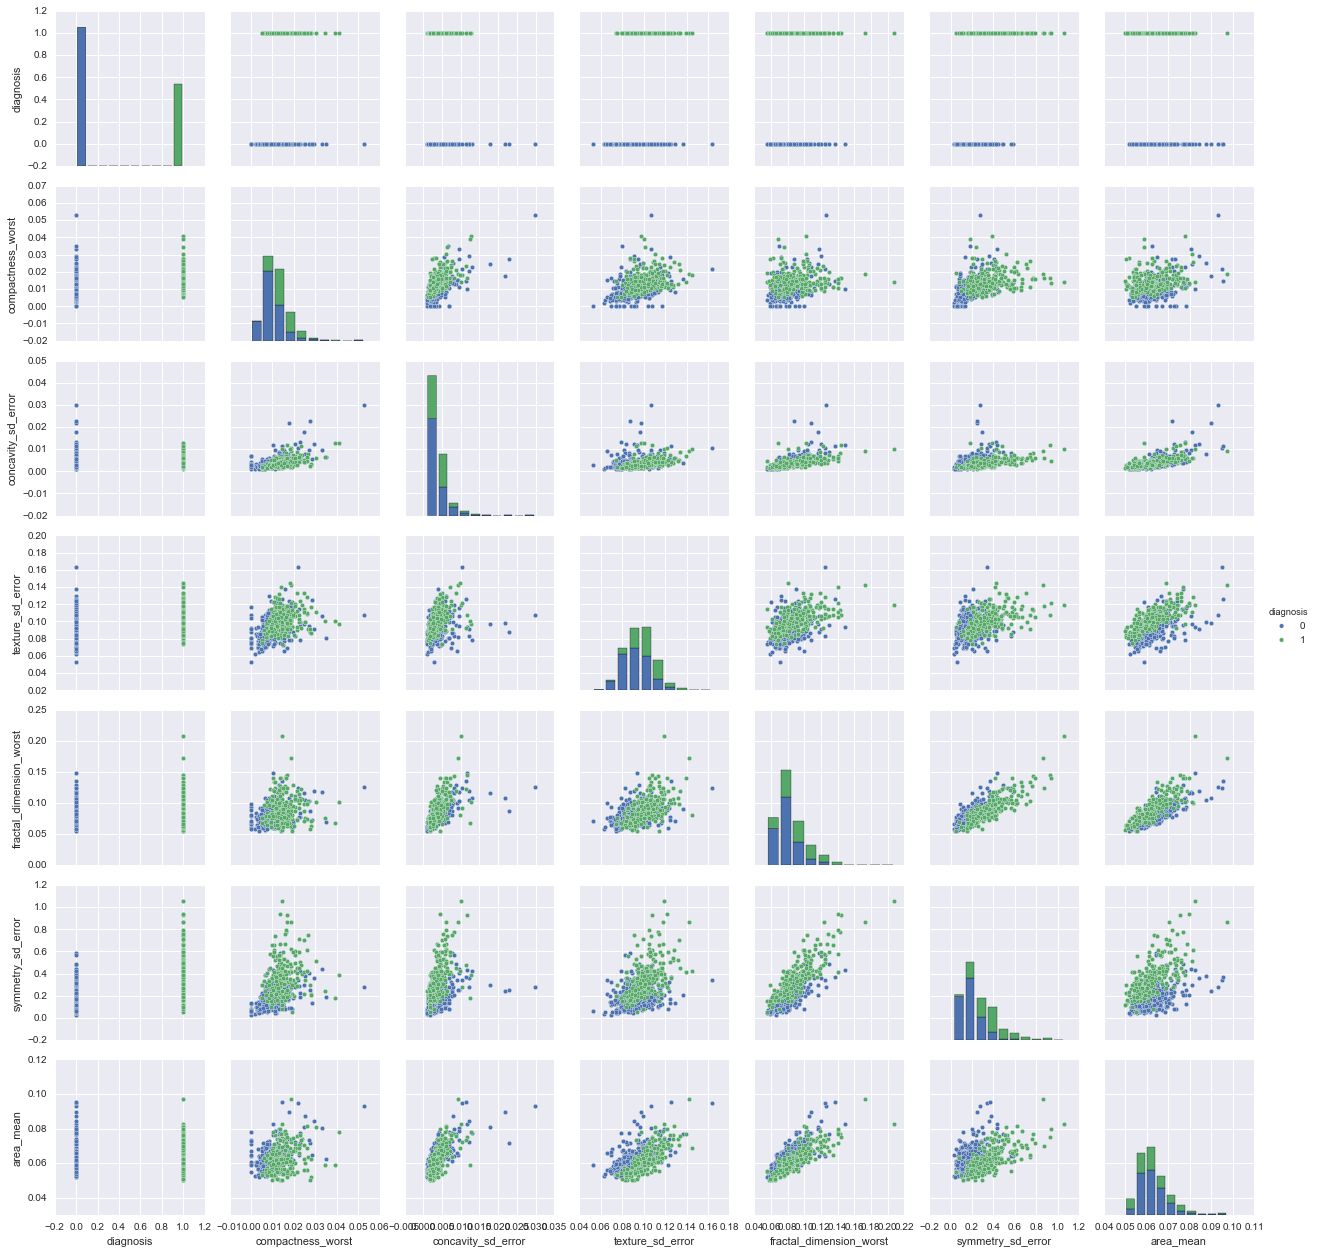

In [50]:
sns.pairplot(malignant_pairplot, hue='diagnosis', vars=malignant_pairplot.columns)

In [54]:
# And if we conduct PCA on benign, we can make sure that the features describe them are different
# conduct PCA
benign_pca = df.loc[df['diagnosis'] == 0].iloc[:,2:]

In [55]:
# scale x and y
scaled_benign = StandardScaler().fit_transform(benign_pca)

In [56]:
pca_df_b = PCA(n_components=3)
pca_df_b.fit(scaled_benign)
pca_final_b = pca_df_b.transform(scaled_benign)

PCAdf_b = pd.DataFrame(pca_final_b, columns=['PC1','PC2', 'PC3'])

In [57]:
pca_corr_b = pd.concat([benign_pca, PCAdf_b], axis =1)

In [58]:
pca_corr1_b = pca_corr_b.corr().iloc[-3:].T
pca_corr1_b = pca_corr1_b[:-3]
print pca_corr1_b.sort_values("PC1").iloc[:5]
print pca_corr1_b.sort_values("PC2").iloc[:5]

                          PC1       PC2       PC3
area_worst          -0.165372 -0.098231  0.077969
area_sd_error       -0.125851 -0.050433 -0.047122
smoothness_mean     -0.124615 -0.017106 -0.112626
smoothness_sd_error -0.122813 -0.036354 -0.056032
radius_sd_error     -0.118424 -0.186013  0.041291
                          PC1       PC2       PC3
radius_sd_error     -0.118424 -0.186013  0.041291
concave_points_mean -0.104284 -0.117509  0.132843
area_worst          -0.165372 -0.098231  0.077969
smoothness_worst    -0.084462 -0.082660 -0.061293
concavity_mean       0.010383 -0.082607 -0.028008


In [ ]:
## another way to find out what's the most predictive feature is to see the feature importance of a model

In [59]:
X = df.iloc[:,2:]
y = df['diagnosis']

In [60]:
from sklearn.cross_validation import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=3)

# print out the size of train and test sets 
print "Train", x_train.shape, y_train.shape
print "Test ", x_test.shape, y_test.shape

Train (381, 30) (381,)
Test  (188, 30) (188,)


In [61]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier,RandomForestClassifier, BaggingClassifier, RandomForestClassifier, ExtraTreesClassifier

# try other ensemble methods (random forest=, extra tree, adaboost, gradient boosting)
dt = DecisionTreeClassifier(random_state=3)
bdt = BaggingClassifier(DecisionTreeClassifier(random_state=3))
rfdt = RandomForestClassifier(random_state=3)
etdt = ExtraTreesClassifier(random_state=3)
abdt = AdaBoostClassifier(random_state=3)
gbdt = GradientBoostingClassifier(random_state=3)

# apply those models to the train set 
result_dt = dt.fit(x_train,y_train)
result_bdt = bdt.fit(x_train,y_train)
result_rfdt = rfdt.fit(x_train,y_train)
result_etdt = etdt.fit(x_train,y_train)
result_abdt = abdt.fit(x_train,y_train)
result_gbdt = gbdt.fit(x_train,y_train)

# print out the accuracy scores 
print "Decision Tree Accuracy Score: " + str(result_dt.score(x_test,y_test))
print "Bagging Decision Tree Accuracy Score: " + str(result_bdt.score(x_test,y_test))
print "Random Forest Accuracy Score: " + str(result_rfdt.score(x_test,y_test))
print "Extra Tree Accuracy Score: " + str(result_etdt.score(x_test,y_test))
print "Ada Boost Accuracy Score: " + str(result_abdt.score(x_test,y_test))
print "Gradient Boosting Accuracy Score: " + str(result_gbdt.score(x_test,y_test))

Decision Tree Accuracy Score: 0.946808510638
Bagging Decision Tree Accuracy Score: 0.957446808511
Random Forest Accuracy Score: 0.946808510638
Extra Tree Accuracy Score: 0.957446808511
Ada Boost Accuracy Score: 0.973404255319
Gradient Boosting Accuracy Score: 0.957446808511


In [64]:
feature_importances_rf = pd.DataFrame(result_rfdt.feature_importances_, 
                                   index = df.iloc[:,2:].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Random Forest'
print feature_importances_rf.head(10)
print ''

feature_importances_et = pd.DataFrame(result_etdt.feature_importances_, 
                                   index = df.iloc[:,2:].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Extra Tree'
print feature_importances_et.head(10)
print ''

feature_importances_ab = pd.DataFrame(result_abdt.feature_importances_, 
                                   index = df.iloc[:,2:].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Ada Boost'
print feature_importances_ab.head(10)
print ''

feature_importances_gb = pd.DataFrame(result_gbdt.feature_importances_, 
                                   index = df.iloc[:,2:].columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)
print 'Gradient Boosting'
print feature_importances_gb.head(10)
print ''

Random Forest
                         importance
fractal_dimension_mean     0.241831
concave_points_sd_error    0.152122
texture_mean               0.136215
concave_points_worst       0.122151
symmetry_worst             0.063430
perimeter_sd_error         0.049854
perimeter_mean             0.042145
radius_worst               0.032467
concavity_worst            0.029991
concave_points_mean        0.028384

Extra Tree
                         importance
radius_mean                0.139541
concave_points_sd_error    0.104755
concavity_worst            0.100932
texture_mean               0.074840
symmetry_worst             0.072260
texture_worst              0.063640
perimeter_sd_error         0.061296
concave_points_worst       0.053998
fractal_dimension_mean     0.049650
radius_sd_error            0.037629

Ada Boost
                            importance
smoothness_sd_error               0.10
compactness_mean                  0.08
fractal_dimension_sd_error        0.08
concavity_sd_er

## Modeling

* Build a model to predict the malignant tumors.
    * Use at least two classification techniques; compare and contrast the advantages and disadvantages of each.
    * Identify how you would control for overfitting in each classification technique.
    * Evaluate the performance of each model.
    * In each model, identify the most important predictive variables and explain how you identified them.

In [94]:
from sklearn.linear_model import LogisticRegression
lr1 = LogisticRegression(penalty='l1')
lr2 = LogisticRegression(penalty='l2')
print "Logistic Regression with L1 penalty Accuracy Score: " + str(lr1.fit(x_train, y_train).score(x_test, y_test))
print "Logistic Regression with L2 penalty Accuracy Score: " + str(lr2.fit(x_train, y_train).score(x_test, y_test))

Logistic Regression with L1 penalty Accuracy Score: 0.952127659574
Logistic Regression with L2 penalty Accuracy Score: 0.946808510638


Logistic regression is good with linearly separable data, but it needs more feature engineering sometimes. It's robust to noise and less prone to overfitting. Logistic regression's results can be interpreted as probabilities. It works great for this dataset. 

In [98]:
from sklearn import svm
svm_linear = svm.SVC(kernel='linear')
svm_rbf = svm.SVC(kernel='rbf')
print "SVM Linear Accuracy Score: " + str(svm_linear.fit(x_train, y_train).score(x_test, y_test))
print "SVM RBF Accuracy Score: " + str(svm_rbf.fit(x_train, y_train).score(x_test, y_test))

SVM Linear Accuracy Score: 0.946808510638
SVM RBF Accuracy Score: 0.63829787234


SVM is similar to logistic. However, it's open to data that's none linearly separable. In this case, we can see the none linear kernel rbf is overfitting the data. 

In [99]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
print "KNN Accuracy Score: " + str(knn.fit(x_train, y_train).score(x_test, y_test))

KNN Accuracy Score: 0.93085106383


K-Nearest Neighbors is simple and doesn't require large training dataset, but doesn't do well with high-dimensional datasets. Since this dataset is simple, the model works well with it. 

In [100]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

#Initialize a variable as the Guassian Naive Bayes classifier and fit it with the data
clf_g = GaussianNB()
clf_m = MultinomialNB()
clf_b = BernoulliNB()

clf_g.fit(x_train, y_train)
clf_m.fit(x_train, y_train)
clf_b.fit(x_train, y_train)

# Predict a few instances
print "Gaussian Accuracy Score: " + str(clf_g.score(x_test, y_test))
print "Multinomial Accuracy Score: " + str(clf_m.score(x_test, y_test))
print "Bernoulli Accuracy Score: " + str(clf_b.score(x_test, y_test))

Gaussian Accuracy Score: 0.957446808511
Multinomial Accuracy Score: 0.898936170213
Bernoulli Accuracy Score: 0.63829787234


Naive Bayes models are simply calculating the probabilities of each categories and it's a good method to use when there are lots of data. Bernoulli is normally used with binary data and that's why the accuracy score is low in this case. And decision tree based models performed very well in this case, but some can require quite high computing powers especially the ensemble methods and sometimes the results can be hard to interpret. 

In [ ]:
# Best model is ada boost, conduct gridsearch 
from sklearn.grid_search import GridSearchCV
scoring = ['accuracy', 'average_precision', 'f1', 'f1_macro', 'f1_micro', 'f1_weighted', 
           'precision', 'precision_macro', 'precision_micro', 'precision_weighted', 
           'recall', 'recall_macro', 'recall_micro', 'recall_weighted', 'roc_auc']
for x in scoring: 
    gs_params = {'alpha':np.linspace(0.1,1,10)}
    clf_b_gs = GridSearchCV(clf_b, gs_params, cv=5, scoring = x)
    print 'Scoring Method: '+ str(x) + '. Score: ' + str(clf_b_gs.fit(x_train, y_train).score(x_test,y_test))

In [71]:
# plot the confusion matrix
from sklearn.metrics import confusion_matrix
predictions = result_abdt.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print cm

[[119   1]
 [  4  64]]


In [72]:
# create a function that plot the confusion matrix 
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
# function that plots confusion matrix

def plot_confusion_matrix(cm, title='Confusion matrix', labels= [1,2,3], cmap=plt.cm.Blues, t_number =2):
    
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    
    tick_marks = np.arange(t_number)
    plt.xticks(tick_marks, labels)
    plt.yticks(tick_marks, labels)
        
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.colorbar()
    plt.tight_layout()
    
    width, height = cm.shape
    
    for x in xrange(width):
        for y in xrange(height):
            plt.annotate(str(cm[x][y]), xy=(y, x), 
                        horizontalalignment='center',
                        verticalalignment='center',
                        color = 'white',
                        fontsize=18).set_path_effects([path_effects.Stroke(linewidth=1, foreground='black'),
                                                       path_effects.Normal()])
        
  

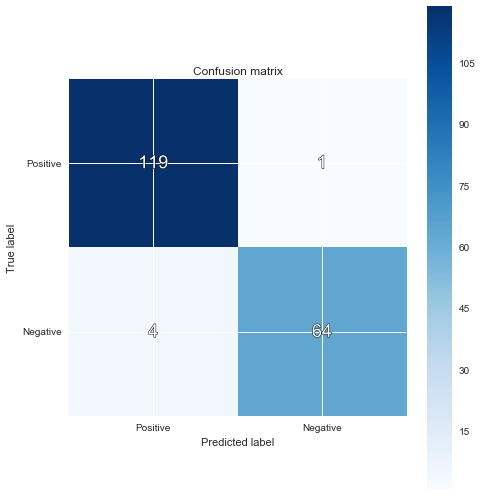

In [73]:
plot_confusion_matrix(cm, labels = ["Positive","Negative"],title='Confusion matrix', cmap=plt.cm.Blues,t_number =2)

### Explanation

* To Technical Audiences - Explain the limitations of your analysis and identify possible further steps you could take.



This dataset has limited entries of data; there are only 569 records. Though the data can be processed quickly, we don't have enough data to train, test, and validate. Therefore, we are less confident on how the model will predict real world data. We also don't know how the data is collected and if the sample accurately represents the population. In addition, lots of the features are high correlated. The next steps are to collect more data so that the model is exposed to more possibilities and will be better to predict. 

* To Non-Technical Audiences - Write a short summary of your analysis, explaining how your model works and how it performs.
Briefly explain the factors that contributed to malignant vs benign tumor identification.

In this case, since we already have the diagnosis for each record, the labels we want to predict, we used supervised classification algorithms. Supervised machine learning is when we split up the dataset, use a portion of it to build the model on, and the other portion to test the accuracy of the model. Many models are tested and the final model that performed the best is a tree-based model with an ensemble method. Tree-based models are similar to a flow chart. The model simply set a threshold for each feature, if it's above the threshold it's one diagnosis and if below it's the other diagnosis. Adaboost, also known as adaptive boosting, focsues on errors that the last decision tree made, and create new and improved ones with more emphasis on the error data points. At the end,  the model combines all the decision trees when predicting to minimized errors. 